In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
email = pd.read_csv("./email.csv")
staff = pd.read_csv("./staff.csv")

In [3]:
staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
ID          18 non-null int64
Name        18 non-null object
Position    18 non-null object
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [4]:
staff.head()

,ID,Name,Position
0,0,James,Director
1,1,David,Director
2,2,George,CEO
3,3,Ronald,Business Development Manager
4,4,John,Business Support Manager


In [5]:
email.head()

,Index,From_ID,Emails_per_month,Weight,To_ID
0,1,0,5,1,1
1,2,0,6,1,2
2,3,1,5,1,2
3,4,2,25,2,3
4,5,2,36,2,4


In [6]:
email.From_ID = email.From_ID.astype("str")
email.To_ID = email.To_ID.astype("str")
staff.ID = staff.ID.astype("str")

In [7]:
from_email_staff = staff.copy();  
from_email_staff.columns = ["From_ID","From_Staff_Name","From_Staff_Position"]

In [8]:
to_email_staff = staff.copy();  
to_email_staff.columns = ["To_ID","To_Staff_Name","To_Staff_Position"]

In [9]:
to_email_staff.head()

,To_ID,To_Staff_Name,To_Staff_Position
0,0,James,Director
1,1,David,Director
2,2,George,CEO
3,3,Ronald,Business Development Manager
4,4,John,Business Support Manager


In [10]:
from_email_staff.head()

,From_ID,From_Staff_Name,From_Staff_Position
0,0,James,Director
1,1,David,Director
2,2,George,CEO
3,3,Ronald,Business Development Manager
4,4,John,Business Support Manager


In [11]:
email = email.merge(from_email_staff, on="From_ID", how="left")
email.head()

,Index,From_ID,Emails_per_month,Weight,To_ID,From_Staff_Name,From_Staff_Position
0,1,0,5,1,1,James,Director
1,2,0,6,1,2,James,Director
2,3,1,5,1,2,David,Director
3,4,2,25,2,3,George,CEO
4,5,2,36,2,4,George,CEO


In [12]:
email = email.merge(to_email_staff, on="To_ID", how="left")

In [13]:
# email.to_csv("email_merge.csv", sep=',', encoding='utf-8')

In [14]:
import markov_clustering as mc
import networkx as nx
import random
from networkx.drawing.nx_agraph import graphviz_layout

In [15]:
filtered_email = email[["From_ID","To_ID","Weight"]]
filtered_email.To_ID = filtered_email.To_ID.astype("int")
filtered_email.From_ID = filtered_email.From_ID.astype("int")

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [16]:

# positions = [x for x in filtered_email.transform(tuple, axis=1)]

In [17]:
# G = nx.DiGraph(directed=True)

# options = {
#     'node_color': 'blue',
#     'node_size': 100,
#     'width': 3,
#     'arrowstyle': '-|>',
#     'arrowsize': 12,
# }
# for (u, v, w) in positions:
# # G.add_weighted_edges_from(positions)
#     G.add_edge(u, v, weight = w)

# # pos = nx.spring_layout(G,scale=200) # positions for all nodes
# pos = graphviz_layout(G,"dot")


# plt.figure(figsize=(15,8))


# nx.draw_networkx_nodes(G,pos=pos,node_size=1000)

# # nx.draw_networkx_labels(G,pos=pos,font_size=20,font_family='sans-serif')

# # nx.draw_networkx_edges(G,pos=pos, arrows=True, options = options)

# nx.draw(G, pos=pos, node_size=1200, node_color='lightblue',
#     linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, dpi=1000)



# # nx.draw(G, pos=graphviz_layout(G), node_size=1200, node_color='lightblue',
# #     linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, dpi=1000)

# # nx.draw(G,pos,font_size = 8)








/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


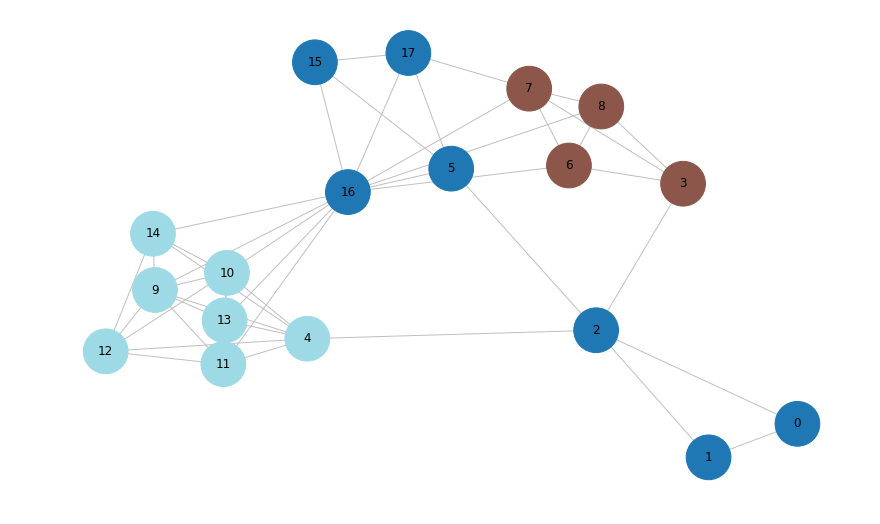

In [18]:
positions = [x for x in filtered_email.transform(tuple, axis=1)]
G = nx.Graph(directed=True)

for (u, v, w) in positions:
    G.add_edge(u, v,weight=w)
# neato, dot, twopi, circo, fdp, 
# , , ,, , 
# , , , sfdp, 

pos = graphviz_layout(G,"sfdp")

# print(pos)

matrix = nx.to_scipy_sparse_matrix(G)
result = mc.run_mcl(matrix=matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)

plt.figure(figsize=(15,9))
mc.draw_graph(matrix, clusters, pos = pos,node_size=2000, with_labels=True, edge_color="silver")

In [19]:
# data = [tuple(str(x) for x in tup) for tup in list(mc.dok_matrix(result).keys())]

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


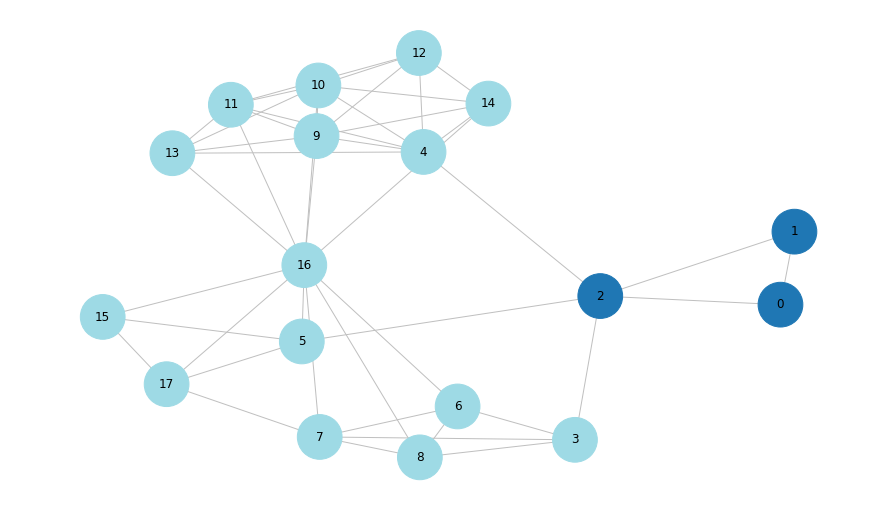

In [20]:
positions = [x for x in filtered_email.transform(tuple, axis=1)]
G = nx.Graph(directed=True)

for (u, v, w) in positions:
    G.add_edge(u, v)
    
pos = graphviz_layout(G,"sfdp")
matrix = nx.to_scipy_sparse_matrix(G)
result = mc.run_mcl(matrix=matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)

plt.figure(figsize=(15,9))
mc.draw_graph(matrix, clusters, node_size=2000, with_labels=True, edge_color="silver")

# Check with name

In [21]:
# filtered_email = email[["From_ID","To_ID","Weight"]]
filtered_email = email[["From_Staff_Name","To_Staff_Name","Weight"]]

# filtered_email.From_ID = filtered_email.From_ID.astype("int")
# filtered_email.To_ID = filtered_email.To_ID.astype("int")

filtered_email.From_Staff_Name = filtered_email.From_Staff_Name
filtered_email.To_Staff_Name = filtered_email.To_Staff_Name

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


# With weight

In [22]:

def draw_cluster_with_weight(intflation):
    positions = [x for x in filtered_email.transform(tuple, axis=1)]
    G = nx.Graph(directed=True)

    for (u, v, w) in positions:
        G.add_edge(u, v,weight=w)
        
    # neato, dot, twopi, circo, fdp, 
    # , , ,, , 
    # , , , sfdp, 

    pos = graphviz_layout(G,"sfdp")

    matrix = nx.to_scipy_sparse_matrix(G)
    # 3.3
    #
#     result = mc.run_mcl(matrix=matrix, inflation=5)           # run MCL with default parameters
    result = mc.run_mcl(matrix=matrix, inflation=intflation)           # run MCL with default parameters

    clusters = mc.get_clusters(result)


    node_name = (dict(zip(np.asarray(np.arange(len(pos.keys()))), pos.keys())))

    plt.figure(figsize=(16,9))

    # make a networkx graph from the adjacency matrix
    graph = nx.Graph(matrix)
    graph = nx.relabel_nodes(graph,node_name)

    # map node to cluster id for colors
    cluster_map = {node: i for i, cluster in enumerate(clusters) for node in cluster}
    colors = [cluster_map[i] for i in range(len(graph.nodes()))]

    # draw
    test = nx.draw_networkx(graph, node_color=colors, pos = pos,node_size=2000, edge_cmap="tab20",
                            with_labels=True, edge_color="silver",cmap="tab20")

    plt.axis("off")
    plt.title("inflation: {}".format(str(intflation)), fontsize=20)
    plt.show(block=False)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


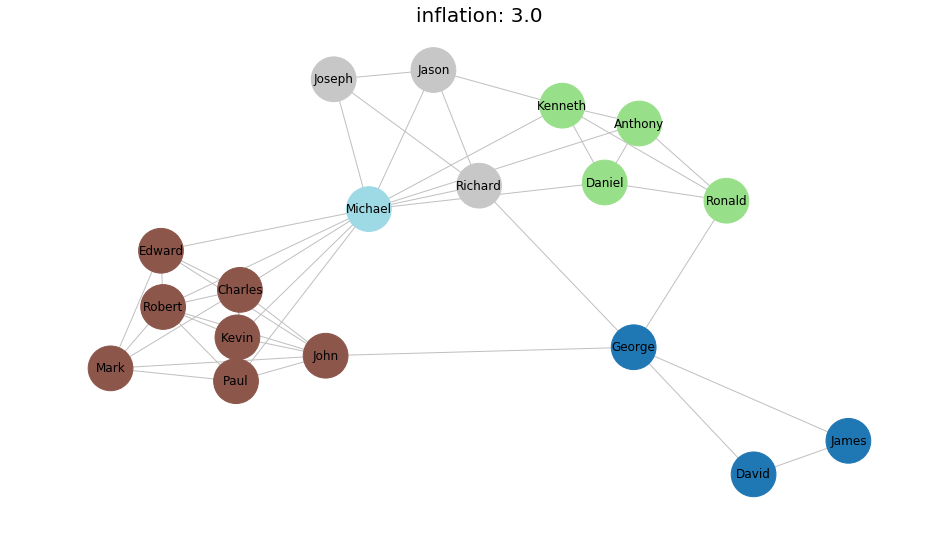

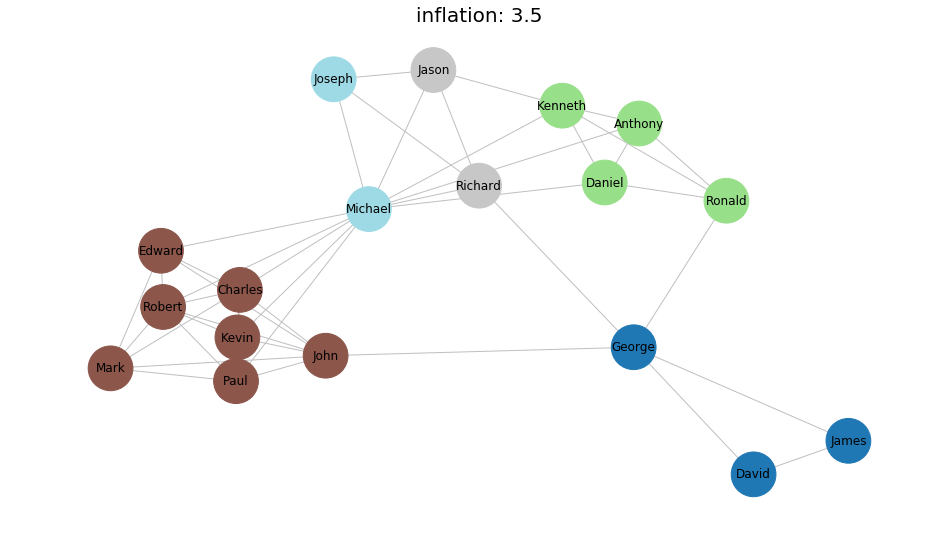

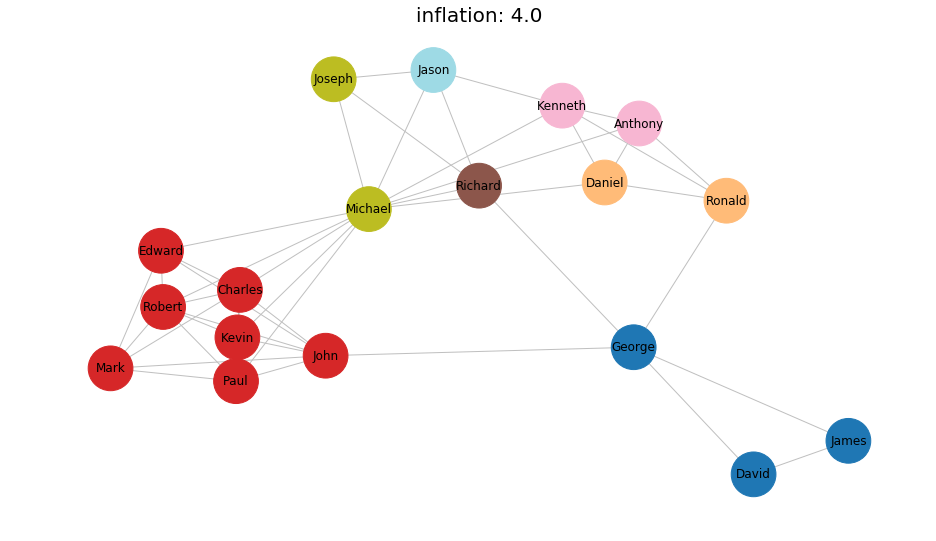

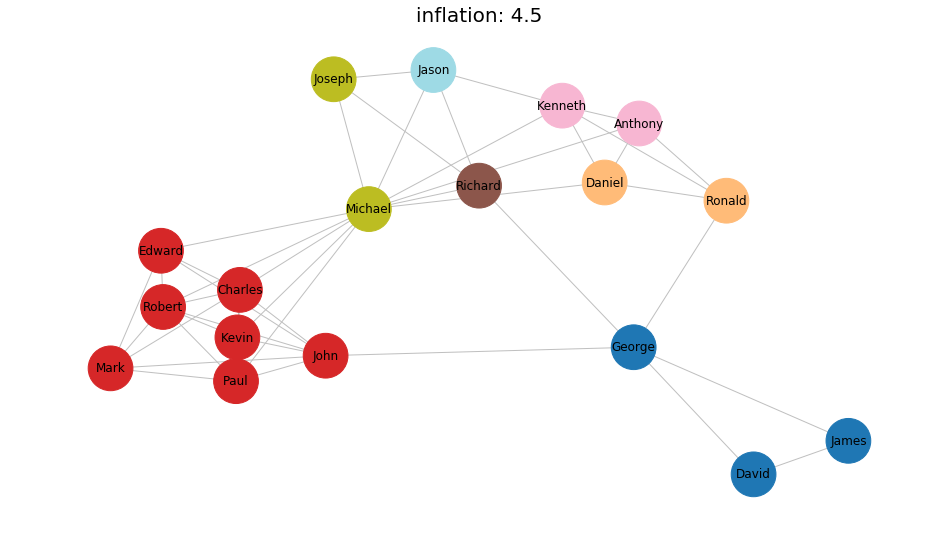

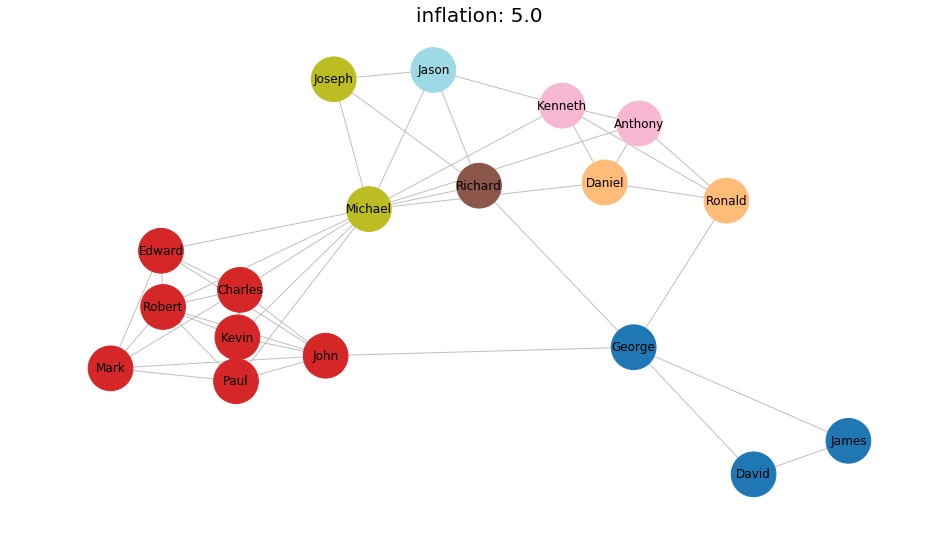

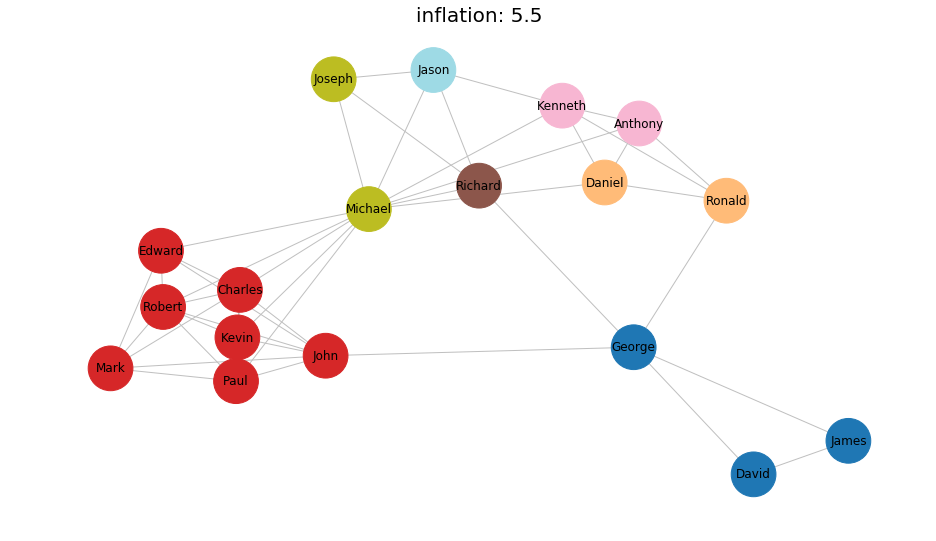

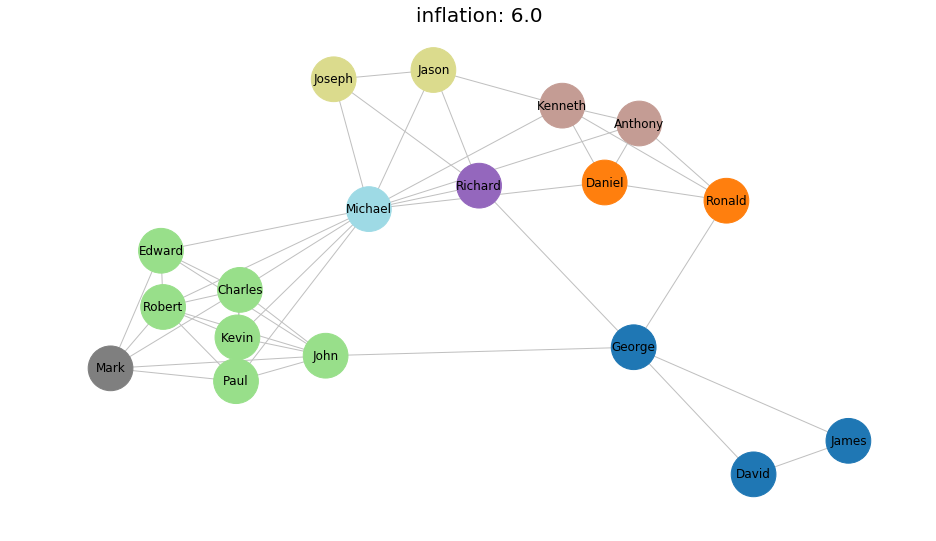

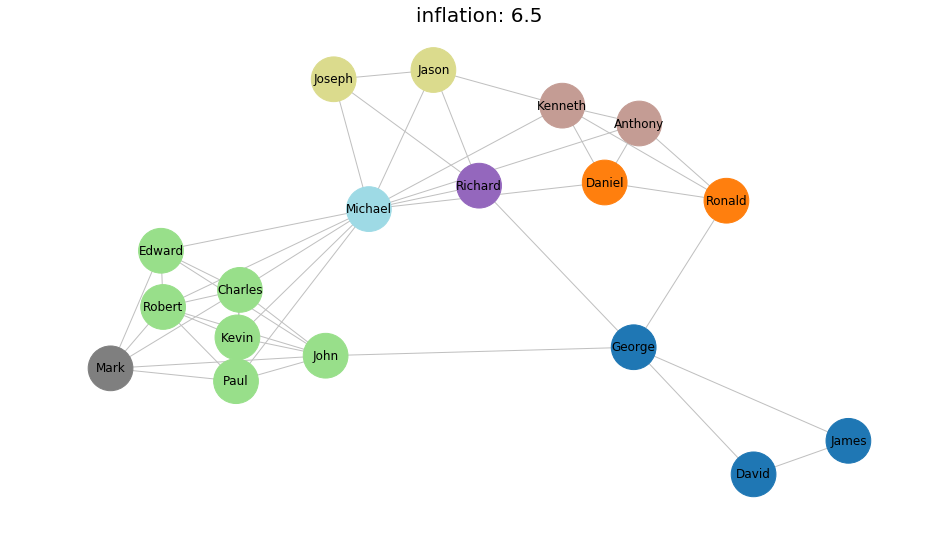

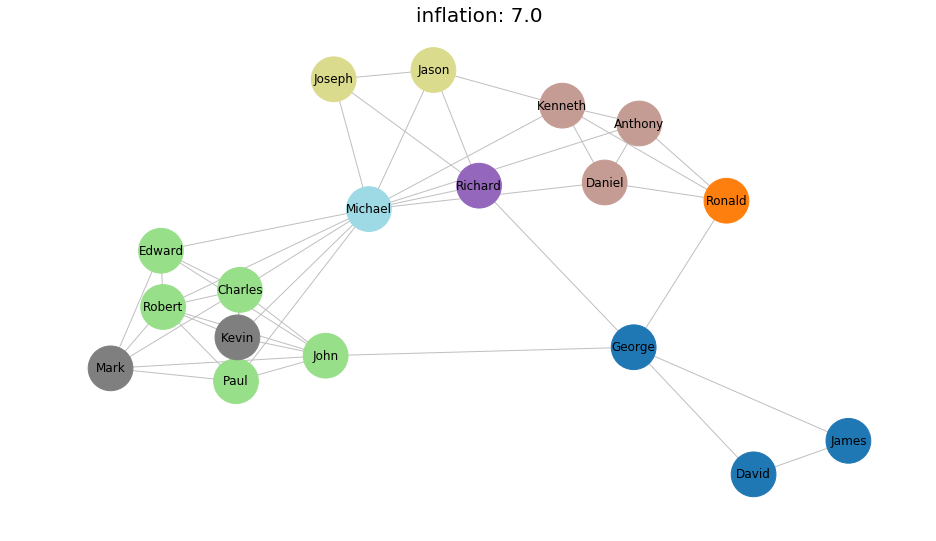

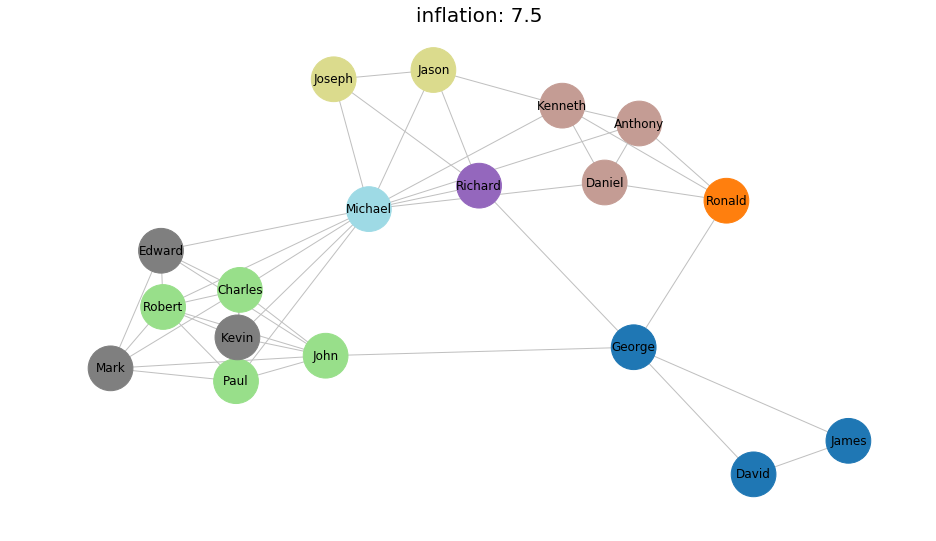

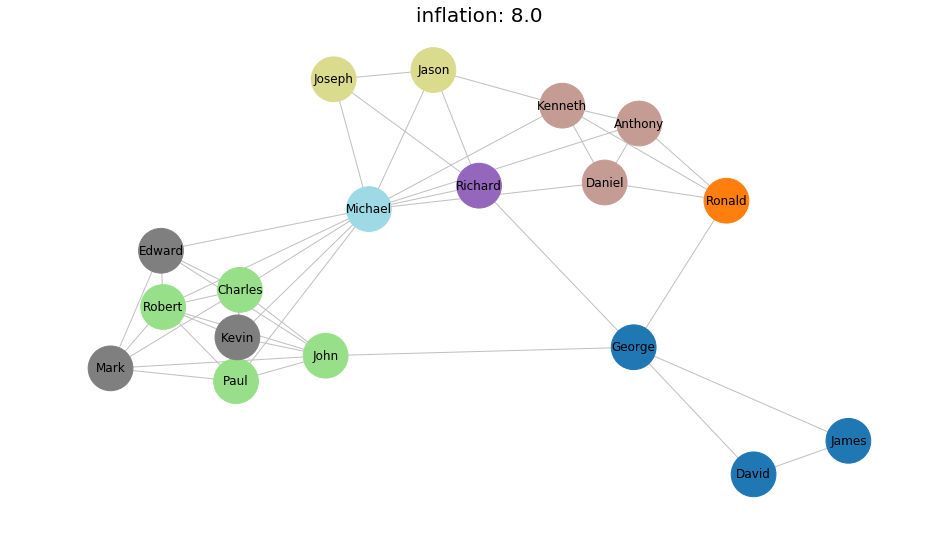

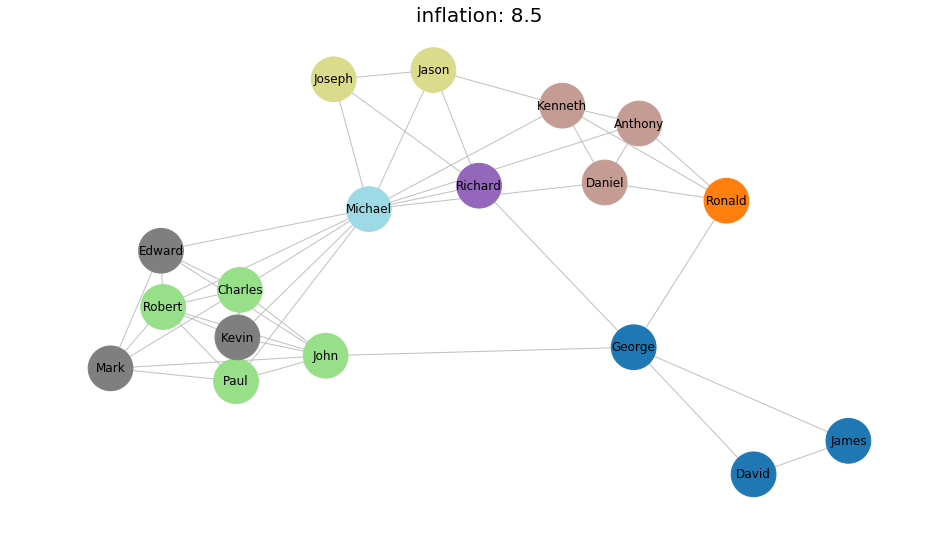

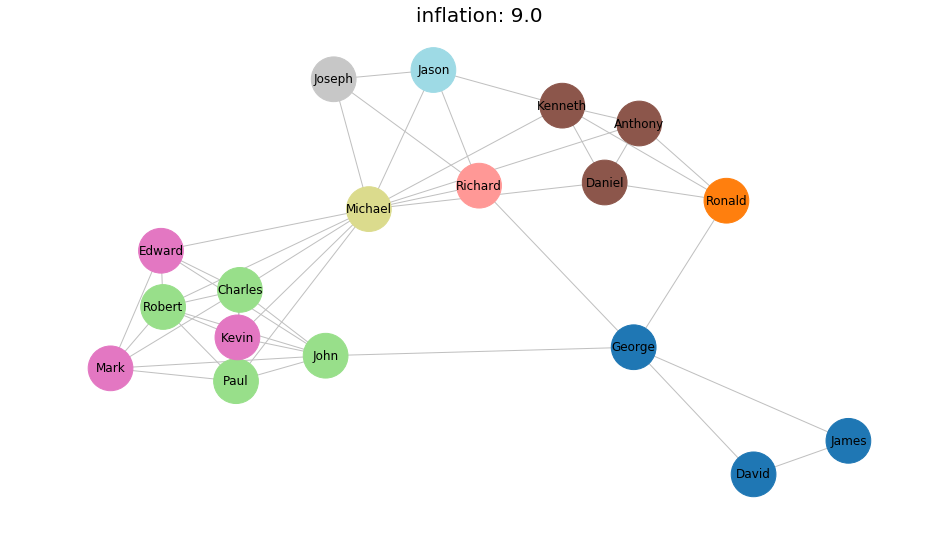

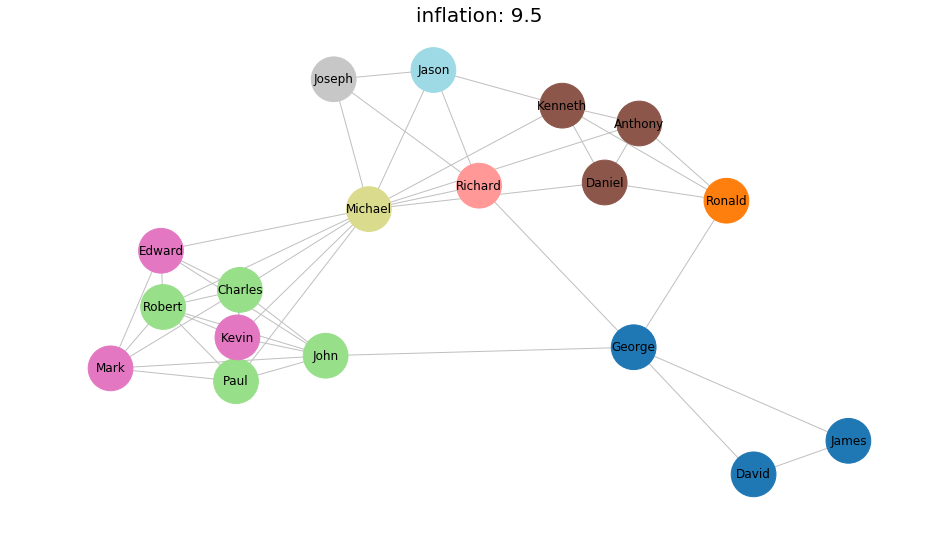

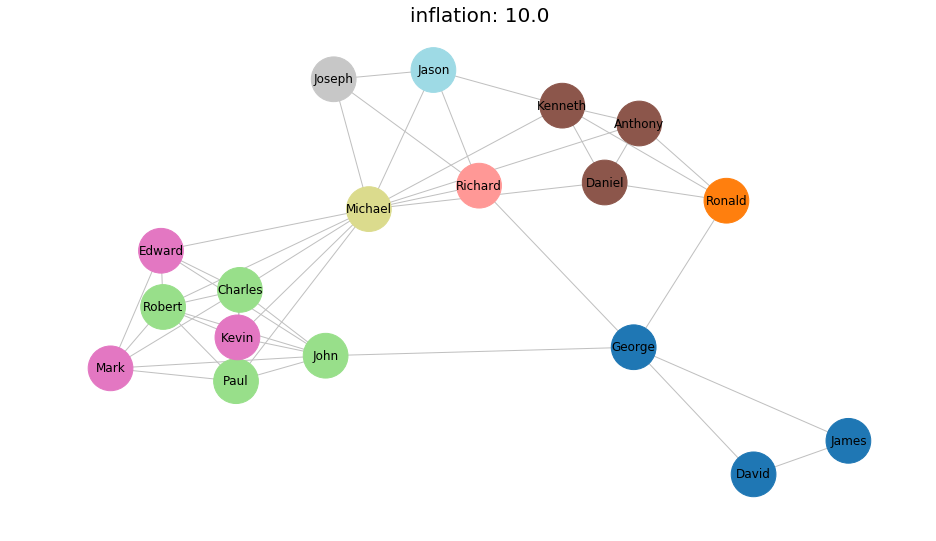

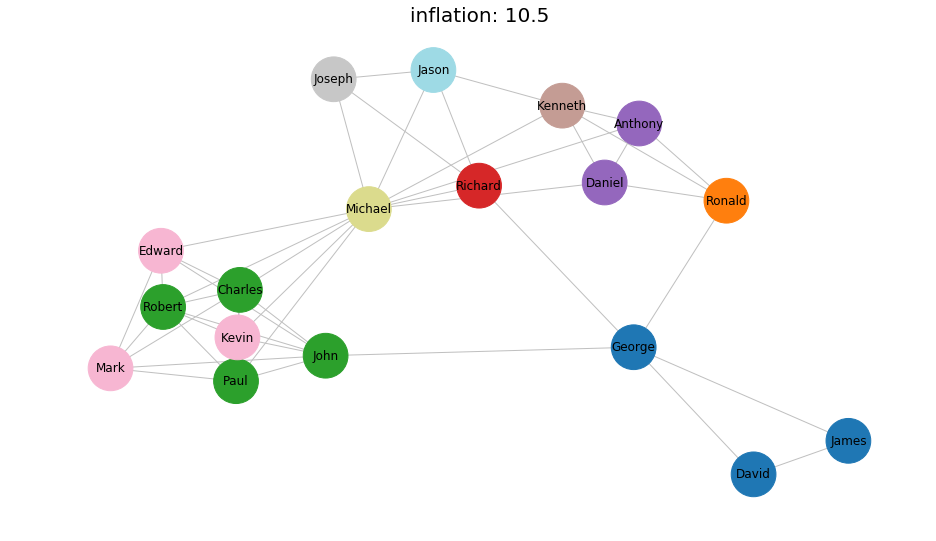

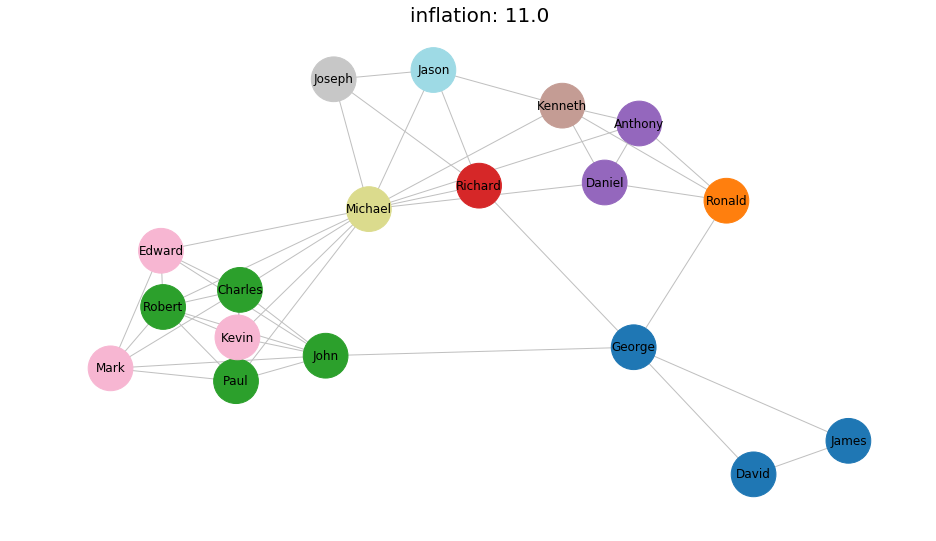

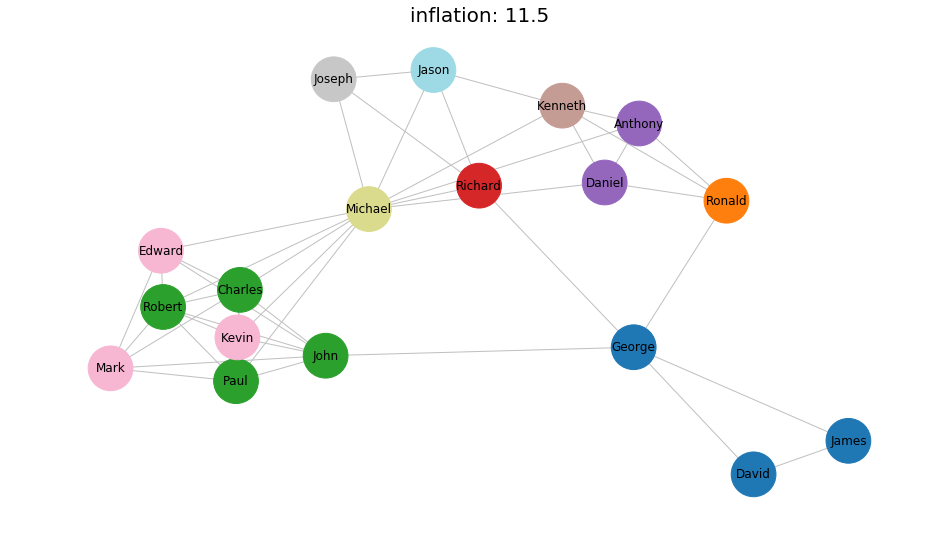

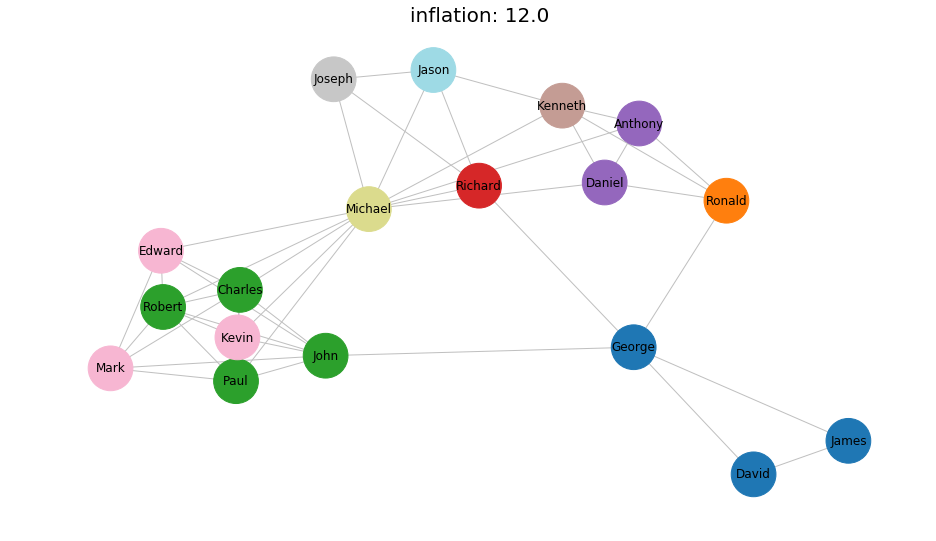

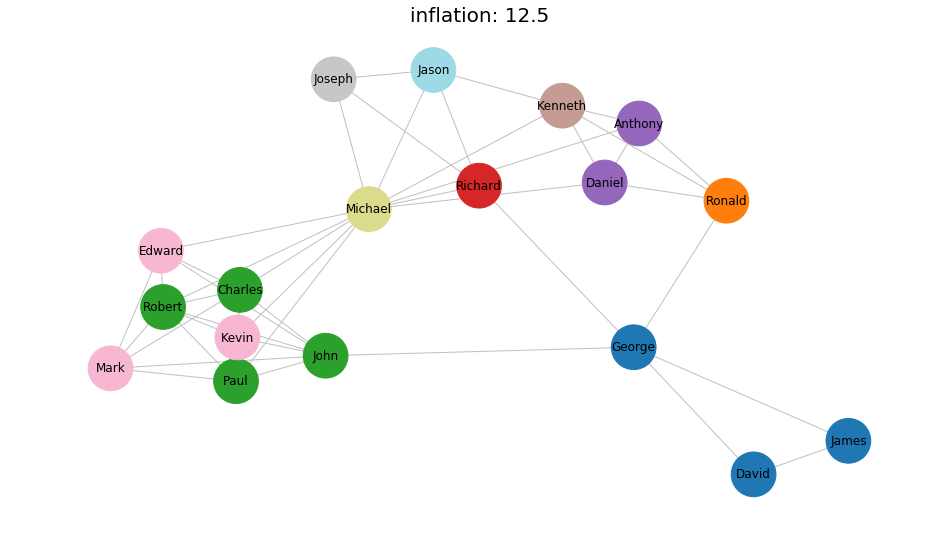

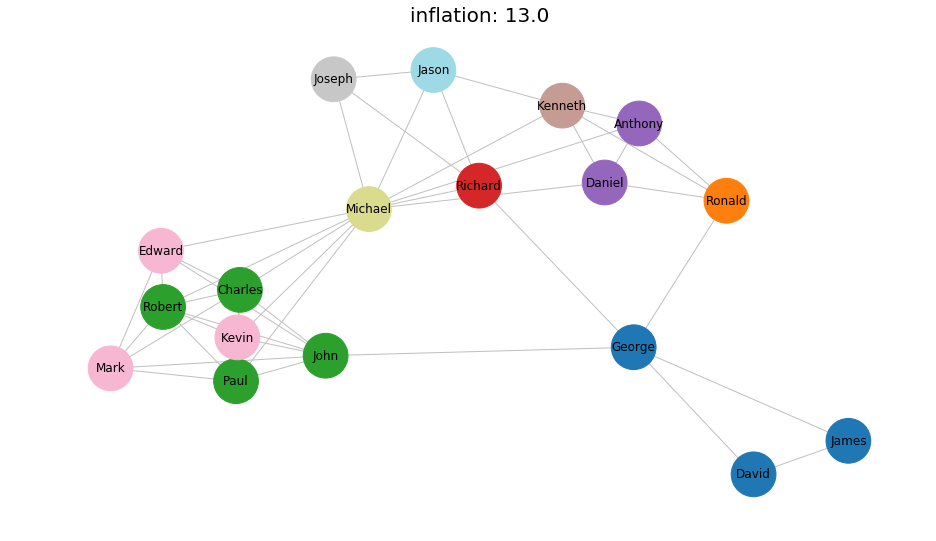

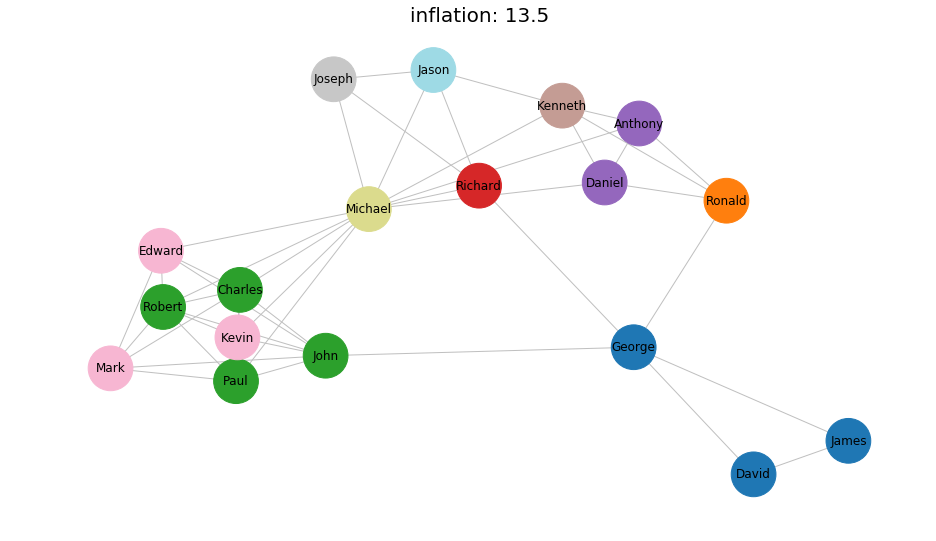

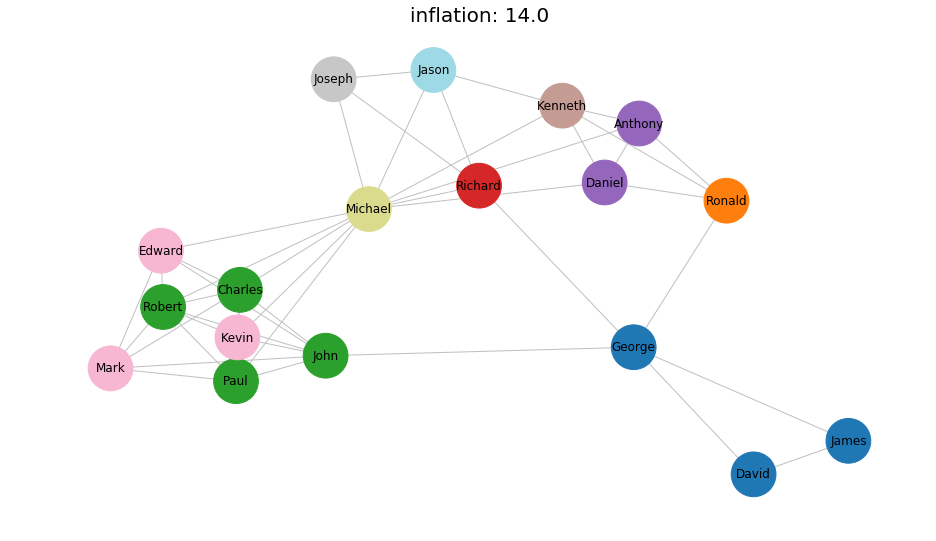

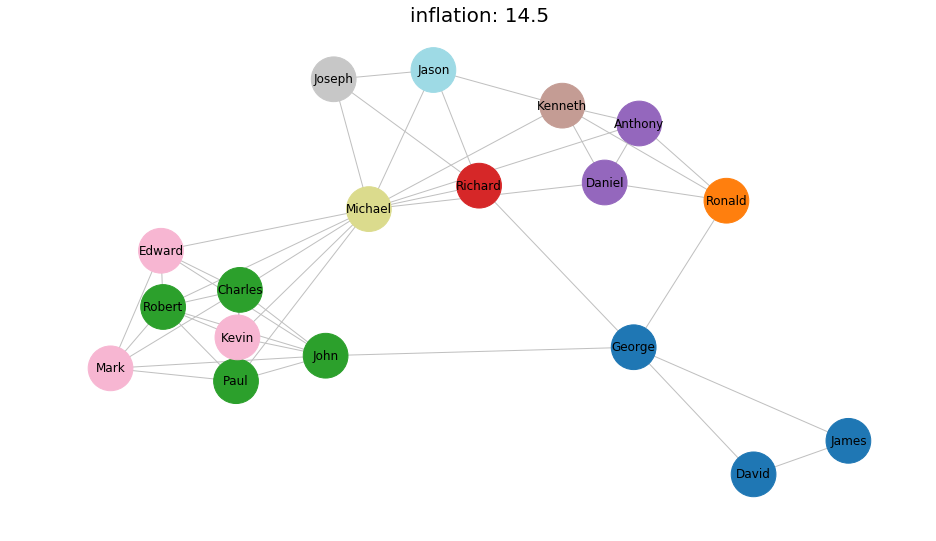

In [23]:
# 
for x in list(np.arange(3,15,0.5)):
    draw_cluster_with_weight(x)

# No weight

In [24]:
def draw_cluster_with_no_weight(intflation):
    positions = [x for x in filtered_email.transform(tuple, axis=1)]
    G = nx.Graph(directed=True)

    for (u, v, w) in positions:
        G.add_edge(u, v)
    # neato, dot, twopi, circo, fdp, 
    # , , ,, , 
    # , , , sfdp, 

    pos = graphviz_layout(G,"sfdp")

    matrix = nx.to_scipy_sparse_matrix(G)
    result = mc.run_mcl(matrix=matrix,inflation=5,iterations=100000)           # run MCL with default parameters
    clusters = mc.get_clusters(result)


    node_name = (dict(zip(np.asarray(np.arange(len(pos.keys()))), pos.keys())))

    plt.figure(figsize=(15,9))

    # make a networkx graph from the adjacency matrix
    graph = nx.Graph(matrix)
    graph = nx.relabel_nodes(graph,node_name)

    # map node to cluster id for colors
    cluster_map = {node: i for i, cluster in enumerate(clusters) for node in cluster}
    colors = [cluster_map[i] for i in range(len(graph.nodes()))]

    # draw
    test = nx.draw_networkx(graph, node_color=colors, pos = pos,node_size=2000, with_labels=True, edge_color="silver",cmap="tab20")

    plt.axis("off")
    plt.title(str(intflation))
    plt.show(block=False)


    # mc.draw_graph(matrix, clusters, pos = pos,node_size=2000, with_labels=True, edge_color="silver")

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


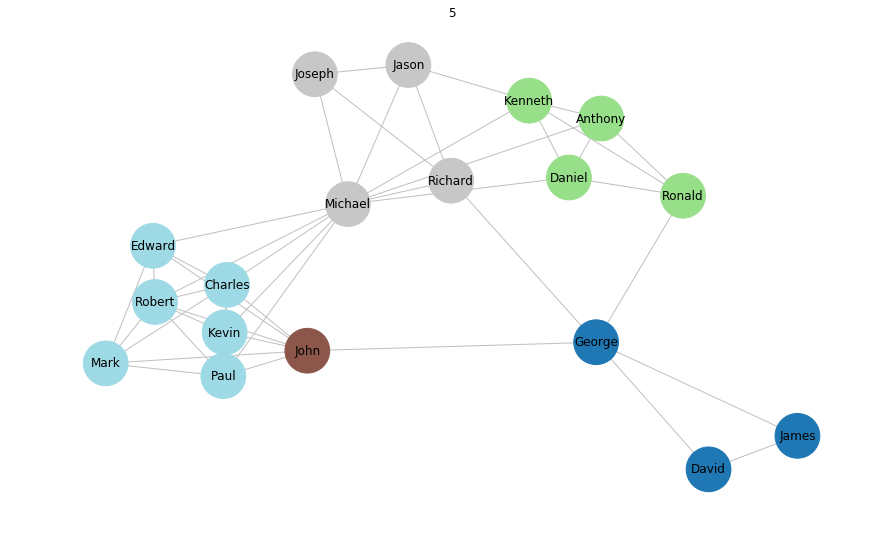

In [25]:
draw_cluster_with_no_weight(5)